In [3]:
import pandas as pd
import numpy as np
from numpy import clip, full, fill_diagonal
from numpy.linalg import inv, norm, lstsq
from numpy.random import uniform, multivariate_normal, rand, randn, seed
from itertools import repeat
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib.colors import to_rgba
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from jupyterthemes import jtplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_swiss_roll
jtplot.style(theme='onedork', context='talk', fscale=1.8, spines=False, 
             gridlines='--', ticks=True, grid=False, figsize=(7, 5))
%matplotlib notebook
pd.options.display.float_format = '{:,.2f}'.format
seed(42)

### Simulate pairwise distances of points in $\mathbb{R}^n$ (while $n$ increases)

In [4]:
def get_distance_metrics(points):
    """Calculate mean of pairwise distances and 
        mean of min pairwise distances"""
    pairwise_dist = squareform(pdist(points))
    fill_diagonal(pairwise_dist, np.nanmax(pairwise_dist))
    avg_distance = np.mean(np.nanmean(pairwise_dist, axis=1))
    avg_min_distance = np.mean(np.nanmin(pairwise_dist, axis=1))
    return avg_distance, avg_min_distance


def simulate_distances(m, n, mean, var, corr):
    """Draw m random vectors of dimension n 
        from uniform and multivariate normal distributions
        and return pairwise distances"""
    uni_dist = get_distance_metrics(uniform(size=(m, n)))

    cov = full(shape=(n, n), fill_value=var * corr)
    fill_diagonal(cov, var)
    normal_points = multivariate_normal(
        full(shape=(n,), fill_value=mean), cov, m)
    normal_points = clip(normal_points, a_min=0, a_max=1)
    norm_dist = get_distance_metrics(normal_points)
    return uni_dist, norm_dist

In [6]:
# sampling params
n_points = 1000
min_dim, max_dim, step = 1, 2502, 100
dimensions = range(min_dim, max_dim, step)

# normal distribution params
mean = 0.5 
var = (mean/3)**2 # 99% of sample in [0, 1]
corr = 0.25

# run simulation
avg_dist = []
for dim in dimensions:
    uni_dist, norm_dist  = simulate_distances(
        n_points, dim, mean, var, corr)
    avg_dist.append([*uni_dist, *norm_dist])
    
col_names = ['Avg. Uniform', 'Min. Uniform',
             'Avg. Normal', 'Min. Normal']
distances = pd.DataFrame(data=avg_dist,  
            columns=col_names, index=dimensions)

In [5]:
def simulate_distances(m, n, mean, var, corr):
    """Draw m random vectors of dimension n 
        from uniform and normal distributions
        and return pairwise distance metrics"""
    uni_dist = get_distance_metrics(uniform(size=(m, n)))
    cov = full(shape=(n, n), fill_value=var * corr)
    fill_diagonal(cov, var)
    normal_points = multivariate_normal(
        full(shape=(n,), fill_value=mean), cov, m)
    normal_points = clip(normal_points, a_min=0, a_max=1)
    norm_dist = get_distance_metrics(normal_points)
    return uni_dist, norm_dist

In [ ]:
def get_distance_metrics(points):
    """Calculate mean of pairwise distances and 
        mean of min pairwise distances"""
    pairwise_dist = squareform(pdist(points))
    fill_diagonal(pairwise_dist, np.nanmean(pairwise_dist, axis=1))
    avg_distance = np.mean(np.nanmean(pairwise_dist, axis=1))
    fill_diagonal(pairwise_dist, np.nanmax(pairwise_dist, axis=1))
    avg_min_distance = np.mean(np.nanmin(pairwise_dist, axis=1))
    return avg_distance, avg_min_distance

In [3]:
def get_distance_metrics(points):
    """Calculate mean of pairwise distances and 
        mean of min pairwise distances"""
    pairwise_dist = squareform(pdist(points))
    fill_diagonal(pairwise_dist, np.nanmax(pairwise_dist))
    avg_distance = np.mean(np.nanmean(pairwise_dist, axis=1))
    avg_min_distance = np.mean(np.nanmin(pairwise_dist, axis=1))
    return avg_distance, avg_min_distance

def simulate_distances(m, n, mean, var, corr):
    """Draw m random vectors of dimension n 
        from uniform and multivariate normal distributions
        and return pairwise distance metrics"""
    uni_dist = get_distance_metrics(uniform(size=(m, n)))
    cov = full(shape=(n, n), fill_value=var * corr)
    fill_diagonal(cov, var)
    normal_points = multivariate_normal(
        full(shape=(n,), fill_value=mean), cov, m)
    normal_points = clip(normal_points, a_min=0, a_max=1)
    norm_dist = get_distance_metrics(normal_points)
    return uni_dist, norm_dist

In [6]:
# sampling params
n_points = 1000
min_dim, max_dim, step = 1, 2502, 100
dimensions = range(min_dim, max_dim, step)

# normal distribution params
mean = 0.5 
var = (mean/3)**2 # 99% of sample in [0, 1]
corr = 0.25

# run simulation
avg_dist = []
for dim in dimensions:
    uni_dist, norm_dist  = simulate_distances(
        n_points, dim, mean, var, corr)
    avg_dist.append([*uni_dist, *norm_dist])
    
col_names = ['Avg. Uniform', 'Min. Uniform',
             'Avg. Normal', 'Min. Normal']
distances = pd.DataFrame(data=avg_dist,  
            columns=col_names, index=dimensions)

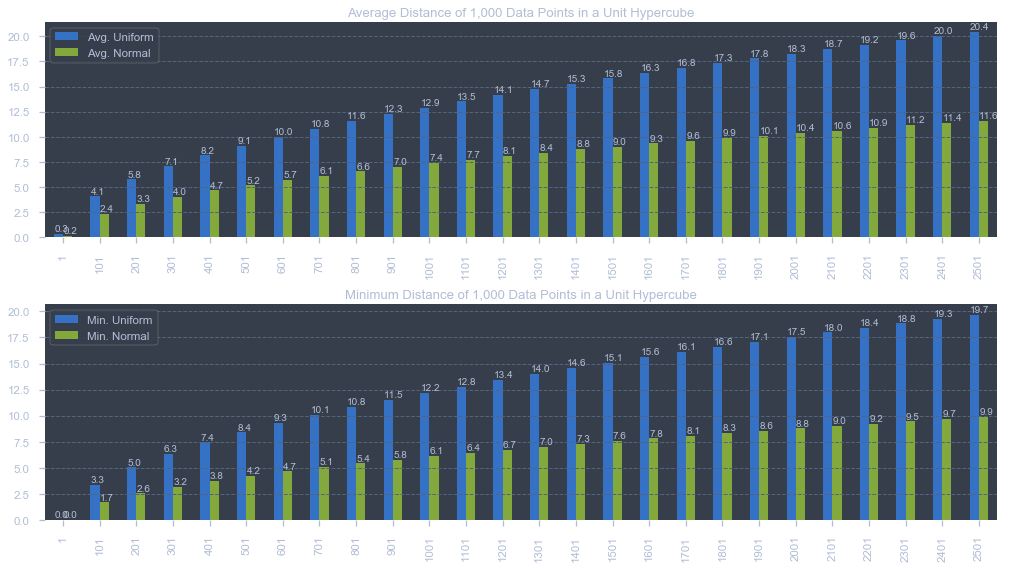

In [4]:
title = 'Distance of {:,.0f} Data Points in a Unit Hypercube'.format(n_points)
fig, axes = plt.subplots(2, 1)
distances[[ 'Avg. Uniform', 'Avg. Normal']].plot.bar(figsize=(14, 8), title='Average ' + title, ax=axes[0])
distances[[ 'Min. Uniform', 'Min. Normal']].plot.bar(figsize=(14, 8), title='Minimum ' + title, ax=axes[1])

for ax in axes:
    ax.grid(axis='y', lw=1, ls='--')
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + .01, p.get_height() + .25))
plt.tight_layout();